In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import  os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # for mac OS

In [2]:
df= pd.read_csv('data/points_xor.csv', sep=',', skiprows=0, header=0)
data_train = df[['x1', 'x2']]
class_train = df['class']
print('data:', data_train.shape)
print('class:', class_train.shape)

data: (4, 2)
class: (4,)


In [3]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

In [4]:
%%time
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=['accuracy'])
fit_log = model.fit(data_train, class_train, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 0.7676 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7658 - accuracy: 0.2500
Epoch 3/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7641 - accuracy: 0.2500
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7625 - accuracy: 0.2500
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7609 - accuracy: 0.2500
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.2500
Epoch 7/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7578 - accuracy: 0.2500
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7563 - accuracy: 0.2500
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7548 - accuracy: 0.2500
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7534 - accuracy: 0.2500
Epoch 11/1000
4/4 [

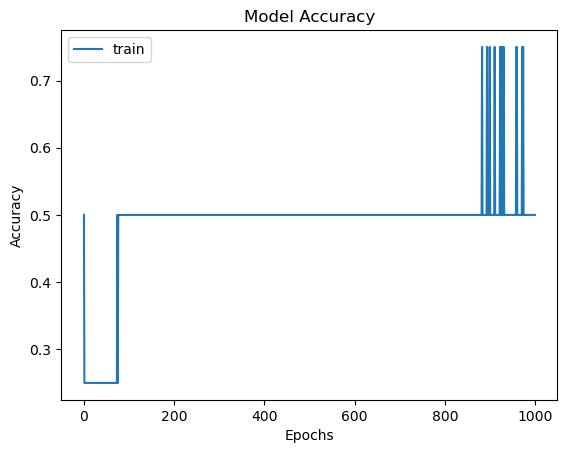

In [5]:
plt.plot(fit_log.history['accuracy'], label='train')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [6]:
pred = model.predict(data_train)
print(pred)

1/1 [==============================] - 0s 184ms/step
[[0.5233534 ]
 [0.50758064]
 [0.49942604]
 [0.48364276]]


In [7]:
t1 = data_train[ class_train==1 ]
t0 = data_train[ class_train==0 ]
t1_x = t1.iloc[:, 0]
t1_y = t1.iloc[:, 1]
t0_x = t0.iloc[:, 0]
t0_y = t0.iloc[:, 1]

In [8]:
g = pd.read_csv('data/grid01_21x21.csv', header=None)
#print(g.shape)  # debug
#print(model.predict(g).shape)  # debug
pred_g = model.predict(g)[:, 0]
g1 = g[ pred_g >= 0.5 ]
g0 = g[ pred_g < 0.5 ]
g1_x = g1.iloc[:, 0]
g1_y = g1.iloc[:, 1]
g0_x = g0.iloc[:, 0]
g0_y = g0.iloc[:, 1]

14/14 [==============================] - 0s 2ms/step


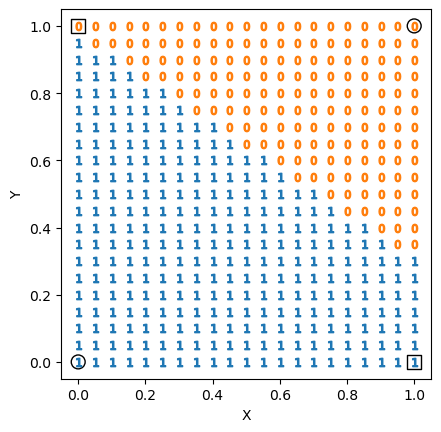

In [9]:
plt.scatter(t1_x, t1_y, marker='s', facecolor='none', edgecolor='black', s=100)
plt.scatter(t0_x, t0_y, marker='o', facecolor='none', edgecolor='black', s=100)
plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()